# Comparativa entre la desviacion de los coordinometros y el nivel de la presa

## Selección del coordinómetro

In [204]:
lado = 'DER'
nivel = 'N3'
eje = 'X'
anio = '2022'

id_coordinometro = lado + '-' + nivel + '-' + eje

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Selección de archivos CSV

In [206]:
# Seleccion de datos del coordinometro
ruta_archivo_coor = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/Resultado/{lado}-{nivel}-{eje}_{anio}.csv'
# Leer el archivo CSV
df_coor = pd.read_csv(ruta_archivo_coor)
df_coor['Timestamp'] = pd.to_datetime(df_coor['Timestamp'])

# Seleccion de datos de nivel
ruta_archivo_nivel = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Niveles/NivelesChanlud.csv'

# Leer el archivo CSV con el delimitador correcto y especificando el separador decimal
df_nivel = pd.read_csv(ruta_archivo_nivel, delimiter=';', decimal=',')
# Convertir la columna 'timeStr' a formato de fecha y hora
df_nivel['timeStr'] = pd.to_datetime(df_nivel['timeStr'])
# Verificar las primeras filas del DataFrame
print(df_nivel.head())


                    tagName             timeStr  average
0  analog.CHACZ01_06.curval 2022-05-06 00:00:00    37.21
1  analog.CHACZ01_06.curval 2022-05-06 01:00:00    37.21
2  analog.CHACZ01_06.curval 2022-05-06 02:00:00    37.21
3  analog.CHACZ01_06.curval 2022-05-06 03:00:00    37.21
4  analog.CHACZ01_06.curval 2022-05-06 04:00:00    37.21


In [207]:
# Función para graficar los datos de los coordinometros
def graficar_coor(df, idCoor, anio):
    plt.figure(figsize=(20, 6))
    plt.plot(df['Timestamp'], df['PosicionCable'], label='PosicionCable')
    
    # Formatear el eje X para mostrar los meses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Rotar las fechas para mejor visualización
    plt.gcf().autofmt_xdate()

    plt.xlabel('Tiempo')
    plt.ylabel('Desviacion [mm]')
    plt.title(f'Gráfico de {idCoor} a lo largo del año {anio}')
    plt.grid(True)  # Opcional: Añadir grid
    plt.legend()
    plt.show()

# Función para graficar los datos de 'average' vs 'timeStr'
def graficar_nivel(df):
    plt.figure(figsize=(20, 6))  # Define el tamaño de la figura
    plt.plot(df['timeStr'], df['average'], label='Nivel', color='blue', marker='o')

    # Formatea el eje x para mostrar los meses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())                                    
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Intervalo de 6 horas

    # Rotar las fechas para mejor visualización
    plt.gcf().autofmt_xdate()

    # Etiquetas y título
    plt.xlabel('Tiempo')
    plt.ylabel('Nivel [m]')
    plt.title('Nivel vs Tiempo')
    plt.grid(True)  # Añade una cuadrícula
    plt.legend()
    plt.show()

In [208]:
def graficar_comparativa(df_coor, df_nivel, idCoor, anio):
    # Crear figura y eje para el gráfico de los coordinómetros
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Graficar datos de los coordinómetros
    ax1.plot(df_coor['Timestamp'], df_coor['PosicionCable'], label='PosicionCable (Coordinómetro)', color='red')
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Desviación [mm]', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Formatear el eje X para mostrar los meses
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    fig.autofmt_xdate()

    # Crear otro eje para el gráfico de nivel
    ax2 = ax1.twinx()
    ax2.plot(df_nivel['timeStr'], df_nivel['average'], label='Nivel', color='blue')
    ax2.set_ylabel('Nivel [m]', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Añadir títulos y leyendas
    plt.title(f'Comparativa entre {idCoor} y Nivel a lo largo del año {anio}')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(True)

    plt.show()

In [209]:

def graficar_intervalo(df_coor, df_nivel, idCoor, anio, mes1, mes2):
    
    # Crear el rango de fechas para el filtro
    inicio = pd.Timestamp(anio, mes1, 1)
    if mes1 == mes2:
        fin = pd.Timestamp(anio, mes1 + 1, 1) - pd.Timedelta(days=1)  # Último día del mes
    else:
        fin = pd.Timestamp(anio, mes2 + 1, 1) - pd.Timedelta(days=1)  # Último día del mes2

    # Filtrar los DataFrames
    df_coor_filtrado = df_coor[(df_coor['Timestamp'] >= inicio) & (df_coor['Timestamp'] <= fin)]
    df_nivel_filtrado = df_nivel[(df_nivel['timeStr'] >= inicio) & (df_nivel['timeStr'] <= fin)]

    # Crear figura y eje para el gráfico de los coordinómetros
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Graficar datos de los coordinómetros
    ax1.plot(df_coor_filtrado['Timestamp'], df_coor_filtrado['PosicionCable'], label='PosicionCable (Coordinómetro)', color='red')
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Desviación [mm]', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Formatear el eje X para mostrar los meses
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    fig.autofmt_xdate()

    # Crear otro eje para el gráfico de nivel
    ax2 = ax1.twinx()
    ax2.plot(df_nivel_filtrado['timeStr'], df_nivel_filtrado['average'], label='Nivel', color='blue')
    ax2.set_ylabel('Nivel [m]', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Añadir títulos y leyendas
    plt.title(f'Comparativa entre {idCoor} y Nivel de {inicio.strftime("%Y-%m-%d")} a {fin.strftime("%Y-%m-%d")}')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(True)

    plt.show()


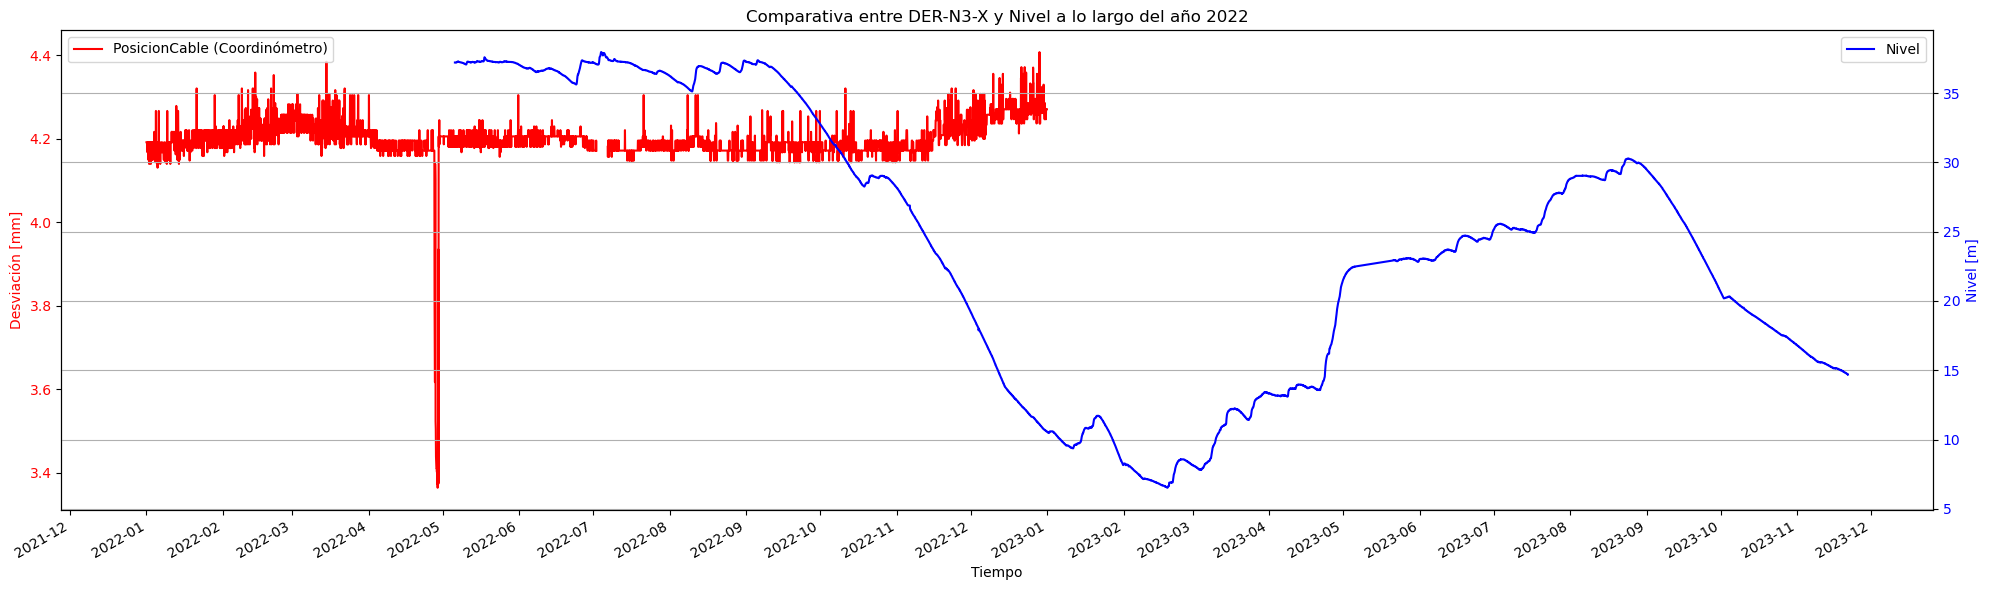

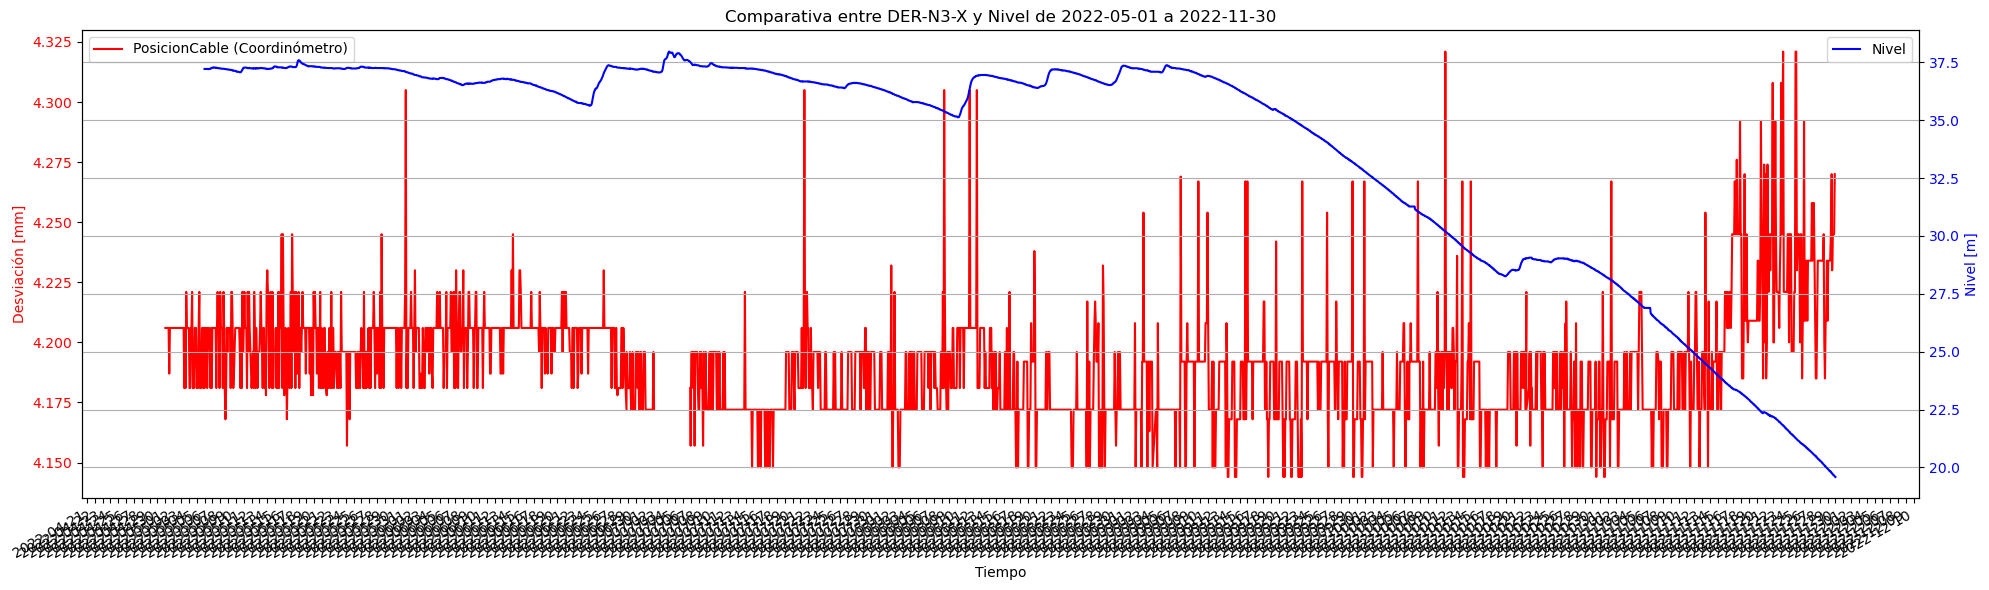

In [210]:
#graficar_datos(df_coor, id_coordinometro,anio)
#graficar_nivel(df_nivel)
graficar_comparativa(df_coor, df_nivel, id_coordinometro, anio)
graficar_intervalo(df_coor, df_nivel, id_coordinometro, int(anio), 5, 11)